In [2]:
from testproblems import generate_random_prob, random_problem_with_artifacts
from datastructures.operators import invert_edges, sort_scc
from datastructures.rendering import render_incidence
from datastructures.tearing import min_arc_set_assign,dir_graph
from datastructures.graphutils import edges_to_Ein_Eout, sources
from datastructures.polycasebuilder import eqv_to_edges_tree
import networkx as nx
import numpy as np
from itertools import chain

In [16]:
m = 6
n = 8
seed = 10
sparsity = 1.
runs = (
    (0.5, 'sparsity_half.png'),
    (1., 'sparsity_one.png'),
    (1.5, 'sparsity_one_and_half.png')
)
sparsity, figname = runs[1]

In [17]:
kwargs = random_problem_with_artifacts(m,n,seed,sparsity)

In [18]:
eq_incidence,outset,eqnidxs,edges_varonleft,varidxs = map(kwargs.get, ["eq_incidence","outset","eqnidxs","edges_varonleft","varidxs"])

In [19]:
edges_default,tree_default,new_outset = eqv_to_edges_tree(eq_incidence, outset, len(eqnidxs))

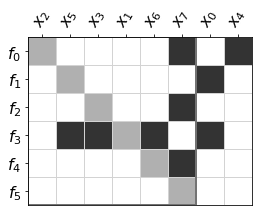

In [20]:
render_incidence(edges_default, tree_default, figname=figname, save=True, figsize=((4,4)));

In [21]:
xsol, m = min_arc_set_assign(edges_varonleft, varidxs, eqnidxs)
outset_opt = dict((right, left) for left, right in edges_varonleft if xsol[left, right] > 0.5)

In [22]:
edges_opt,tree_opt,new_outset_opt = eqv_to_edges_tree(eq_incidence, outset_opt, len(eqnidxs))

In [23]:
inputids = sources(*edges_to_Ein_Eout(edges_opt))

In [24]:
D = nx.DiGraph(dir_graph(edges_varonleft, eqnidxs, outset.items()))
tree_opt = [{elt:2 for elt in chain(*sort_scc(D, lambda x: x in eqnidxs))},{2:1},{v:1 for v in inputids}]

In [25]:
newidx = 'obj'

In [26]:
edges_opt[0][newidx] = tuple(inputids)
edges_opt[1][newidx] = (None,)
tree_opt[0][newidx] = 2

In [27]:
tree_opt

[{5: 2, 1: 2, 0: 2, 2: 2, 4: 2, 3: 2, 'obj': 2}, {2: 1}, {4: 1, 5: 1}]

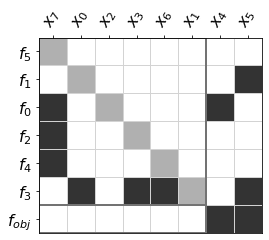

In [28]:
render_incidence(edges_opt, tree_opt, figname="synthetic_example_opt.png", save=True, figsize=((4,4)));

In [158]:
tree_default = ({elt:2 for elt in eqnidxs},{2:1},{v:1 for v in inputids})
edges_default[0][newidx] = tuple(inputids)
edges_default[1][newidx] = (None,)

In [159]:
tree_default[0][newidx] = 2

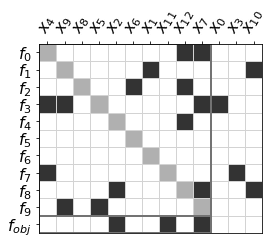

In [160]:
render_incidence(edges_default, tree_default, figname="synthetic_example_default.png", save=True, figsize=((4,4)));